##Step 1: Setting up the environment by importing packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Step 2: Mount Google Drive to access dataset file directly in Colab.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Step 3: Loading dataset(diabetes.csv) and printing first few rows

In [8]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

# Display the first few rows
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


##Step 4:  Data Cleaning. Here data cleaning i.e., replacing 0 with 'nan' at 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' columns because these columns are biometric or physiological measurements and cannot logically be zero for a living patient and are considered where zero values are considered missing.So, zeroes here are likely placeholders for missing values, not real data.

In [13]:
#cols_with_zero is just a list like: ['Glucose', 'BloodPressure', ...]. It helps us refer to multiple columns at once in the next lines.
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Selects only the columns present in that list and replace zeros with NaN
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Takes the updated result (with 0s replaced by NaNs) and assigns it back to the same columns
df[cols_with_zero] = df[cols_with_zero].fillna(df[cols_with_zero].mean())


##Step 5-A: Random Sampling and Glucose Analysis

Sample Mean Glucose: 116.64
Sample Max Glucose: 183.0
Population Mean Glucose: 121.68676277850591
Population Max Glucose: 199.0


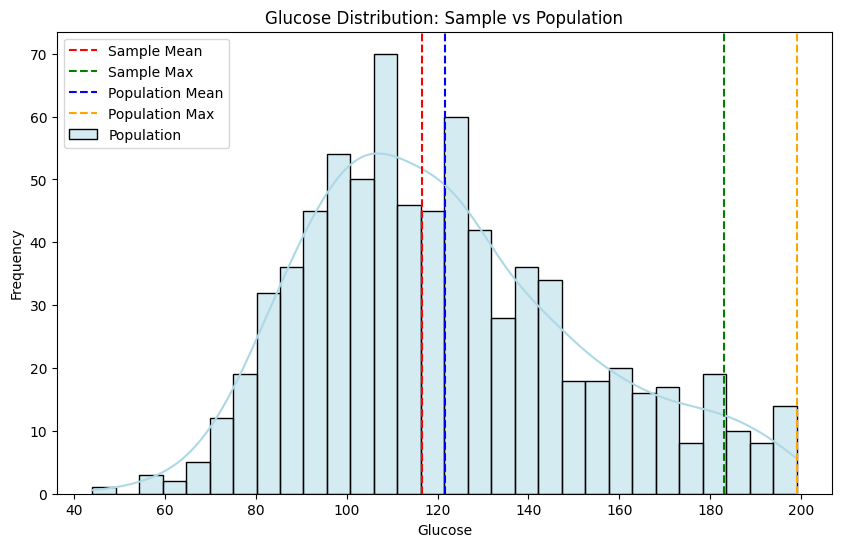

In [10]:
# Set seed for reproducibility
np.random.seed(42)

# Take a random sample of 25 observations
sample_df = df.sample(n=25, random_state=42)

# Calculate sample statistics
sample_mean_glucose = sample_df['Glucose'].mean()
sample_max_glucose = sample_df['Glucose'].max()

# Calculate population statistics
population_mean_glucose = df['Glucose'].mean()
population_max_glucose = df['Glucose'].max()

# Display the results
print(f"Sample Mean Glucose: {sample_mean_glucose}")
print(f"Sample Max Glucose: {sample_max_glucose}")
print(f"Population Mean Glucose: {population_mean_glucose}")
print(f"Population Max Glucose: {population_max_glucose}")

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['Glucose'], bins=30, kde=True, color='lightblue', label='Population')
plt.axvline(sample_mean_glucose, color='red', linestyle='--', label='Sample Mean')
plt.axvline(sample_max_glucose, color='green', linestyle='--', label='Sample Max')
plt.axvline(population_mean_glucose, color='blue', linestyle='--', label='Population Mean')
plt.axvline(population_max_glucose, color='orange', linestyle='--', label='Population Max')
plt.title('Glucose Distribution: Sample vs Population')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.legend()
plt.show()


##Step 5-B: BMI 98th Percentile Comparison

Sample 98th Percentile BMI: 40.248
Population 98th Percentile BMI: 47.52599999999996


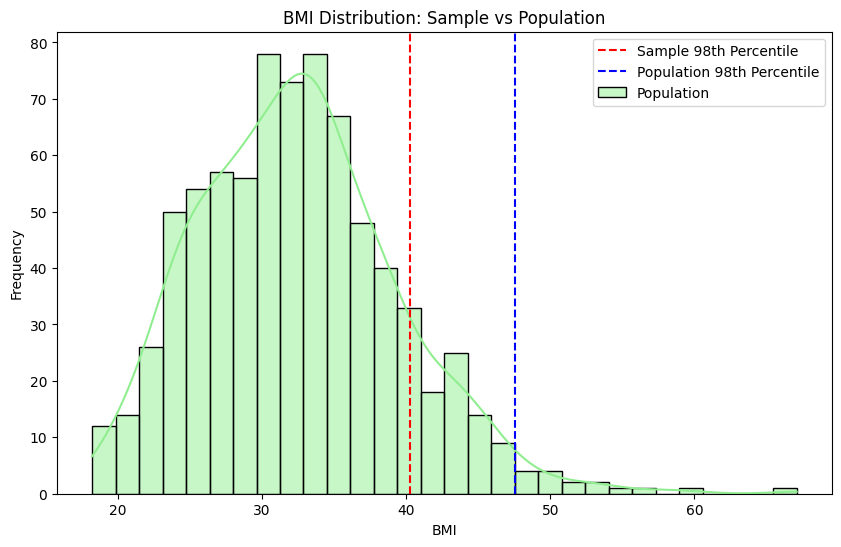

In [11]:
# Calculate 98th percentile
sample_bmi_98th = np.percentile(sample_df['BMI'], 98)
population_bmi_98th = np.percentile(df['BMI'], 98)

# Display the results
print(f"Sample 98th Percentile BMI: {sample_bmi_98th}")
print(f"Population 98th Percentile BMI: {population_bmi_98th}")

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], bins=30, kde=True, color='lightgreen', label='Population')
plt.axvline(sample_bmi_98th, color='red', linestyle='--', label='Sample 98th Percentile')
plt.axvline(population_bmi_98th, color='blue', linestyle='--', label='Population 98th Percentile')
plt.title('BMI Distribution: Sample vs Population')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()
plt.show()


##Step 5-C: Bootstrap Analysis on BloodPressure

Bootstrap Mean BloodPressure: 72.39460638472033
Bootstrap Std Dev BloodPressure: 12.056817064216721
Bootstrap 98th Percentile BloodPressure: 97.90244000000003
Population Mean BloodPressure: 72.40518417462482
Population Std Dev BloodPressure: 12.096346184037948
Population 98th Percentile BloodPressure: 99.31999999999994


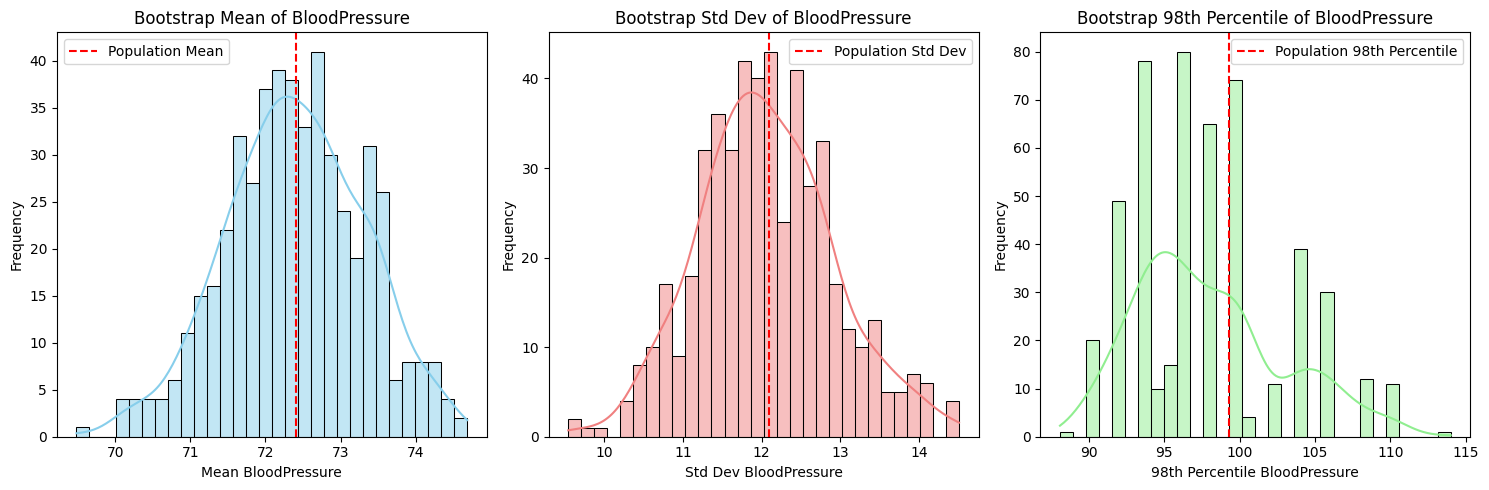

In [12]:
# Bootstrap parameters
n_iterations = 500
sample_size = 150

# Lists to store bootstrap statistics
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

# Bootstrap sampling
for _ in range(n_iterations):
    bootstrap_sample = df['BloodPressure'].sample(n=sample_size, replace=True)
    bootstrap_means.append(bootstrap_sample.mean())
    bootstrap_stds.append(bootstrap_sample.std())
    bootstrap_percentiles.append(np.percentile(bootstrap_sample, 98))

# Convert lists to numpy arrays
bootstrap_means = np.array(bootstrap_means)
bootstrap_stds = np.array(bootstrap_stds)
bootstrap_percentiles = np.array(bootstrap_percentiles)

# Population statistics
population_mean_bp = df['BloodPressure'].mean()
population_std_bp = df['BloodPressure'].std()
population_98th_bp = np.percentile(df['BloodPressure'], 98)

# Display the results
print(f"Bootstrap Mean BloodPressure: {bootstrap_means.mean()}")
print(f"Bootstrap Std Dev BloodPressure: {bootstrap_stds.mean()}")
print(f"Bootstrap 98th Percentile BloodPressure: {bootstrap_percentiles.mean()}")
print(f"Population Mean BloodPressure: {population_mean_bp}")
print(f"Population Std Dev BloodPressure: {population_std_bp}")
print(f"Population 98th Percentile BloodPressure: {population_98th_bp}")

# Visualization
plt.figure(figsize=(15, 5))

# Mean
plt.subplot(1, 3, 1)
sns.histplot(bootstrap_means, bins=30, kde=True, color='skyblue')
plt.axvline(population_mean_bp, color='red', linestyle='--', label='Population Mean')
plt.title('Bootstrap Mean of BloodPressure')
plt.xlabel('Mean BloodPressure')
plt.ylabel('Frequency')
plt.legend()

# Standard Deviation
plt.subplot(1, 3, 2)
sns.histplot(bootstrap_stds, bins=30, kde=True, color='lightcoral')
plt.axvline(population_std_bp, color='red', linestyle='--', label='Population Std Dev')
plt.title('Bootstrap Std Dev of BloodPressure')
plt.xlabel('Std Dev BloodPressure')
plt.ylabel('Frequency')
plt.legend()

# 98th Percentile
plt.subplot(1, 3, 3)
sns.histplot(bootstrap_percentiles, bins=30, kde=True, color='lightgreen')
plt.axvline(population_98th_bp, color='red', linestyle='--', label='Population 98th Percentile')
plt.title('Bootstrap 98th Percentile of BloodPressure')
plt.xlabel('98th Percentile BloodPressure')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()
